Count-Sort

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import time

def counting_sort(arr):
    max_val = max(arr)
    count = [0] * (max_val + 1)
    
    for num in arr:
        count[num] += 1
    
    index = 0
    for i in range(len(count)):  
        while count[i] > 0:      
            arr[index] = i
            index += 1
            count[i] -= 1

sizes = [100, 500, 1000, 5000, 10000]
times_1_blue = []  

for size in sizes:
    arr = np.random.randint(0, size, size) 
    arr.sort()  
    arr = arr[::-1]
    
    print(f"\nArray size: {size}")
    print("Original array :", arr[:10],"....")
    
    start_time = time.time()
    arr = list(arr)
    counting_sort(arr)
    end_time = time.time()
    
    time_taken = (end_time - start_time) * 1000  
    times_1_blue.append(time_taken)  
    
    print("Sorted array :", arr[:10],"....")
    print(f"Time taken: {time_taken} ms")


Array size: 100
Original array : [99 98 98 97 97 95 93 90 90 89] ....
Sorted array : [1, 1, 1, 6, 8, 10, 13, 14, 15, 16] ....
Time taken: 0.0 ms

Array size: 500
Original array : [499 499 497 497 497 495 494 493 493 492] ....
Sorted array : [0, 2, 2, 4, 5, 8, 9, 14, 15, 16] ....
Time taken: 0.0 ms

Array size: 1000
Original array : [999 999 998 998 997 993 993 991 991 991] ....
Sorted array : [1, 2, 2, 5, 7, 8, 8, 8, 9, 10] ....
Time taken: 0.0 ms

Array size: 5000
Original array : [4996 4996 4994 4992 4991 4989 4988 4988 4986 4985] ....
Sorted array : [1, 2, 3, 4, 5, 5, 6, 6, 7, 7] ....
Time taken: 0.99945068359375 ms

Array size: 10000
Original array : [9997 9997 9996 9995 9994 9992 9991 9991 9990 9990] ....
Sorted array : [0, 0, 0, 3, 4, 4, 9, 10, 10, 11] ....
Time taken: 2.943754196166992 ms


Radix-Sort

In [3]:
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n  
    count = [0] * 10  

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr , max_val):
    
    num_digits = len(str(max_val))
    
    padded_arr = [str(num).zfill(num_digits) for num in arr] 

    padded_arr = list(map(int, padded_arr))

    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(padded_arr, exp)
        exp *= 10

    for i in range(len(arr)):
        arr[i] = padded_arr[i]

sizes = [100, 500, 1000, 5000, 10000]
times_2_blue = []  

for size in sizes:
    arr = np.random.randint(0, size, size)  
    arr.sort()  
    arr = arr[::-1]
    
    print(f"\nArray size: {size}")
    print("Original array :", arr[:10],"....")
    
    start_time = time.time()
    arr = list(arr)
    radix_sort(arr , max(arr))
    end_time = time.time()
    
    time_taken = (end_time - start_time) * 1000  
    times_2_blue.append(time_taken)  
    
    print("Sorted array :", arr[:10],"....")
    print(f"Time taken: {time_taken} ms")

    time2 = time



Array size: 100
Original array : [98 98 98 97 97 96 96 95 94 94] ....
Sorted array : [2, 3, 3, 3, 6, 6, 6, 11, 12, 16] ....
Time taken: 1.0449886322021484 ms

Array size: 500
Original array : [499 498 496 496 496 495 493 493 492 491] ....
Sorted array : [0, 1, 2, 6, 7, 9, 10, 10, 10, 11] ....
Time taken: 1.1856555938720703 ms

Array size: 1000
Original array : [999 998 998 998 998 997 995 993 993 993] ....
Sorted array : [1, 3, 4, 4, 5, 5, 6, 6, 11, 17] ....
Time taken: 3.8368701934814453 ms

Array size: 5000
Original array : [4998 4998 4997 4997 4996 4992 4992 4991 4991 4991] ....
Sorted array : [2, 3, 3, 3, 4, 6, 8, 11, 14, 15] ....
Time taken: 17.49587059020996 ms

Array size: 10000
Original array : [9999 9998 9998 9996 9996 9996 9994 9993 9993 9992] ....
Sorted array : [0, 1, 1, 2, 3, 7, 8, 8, 10, 10] ....
Time taken: 25.244712829589844 ms


Bucket-Sort

In [4]:
def bucket_sort(arr , max_val):

    size = len(arr)

    buckets = [[] for _ in range(size)]

    for i in range(size):

        bucket_index = int(arr[i] * size / (max_val + 1))
        buckets[bucket_index].append(arr[i])

    for bucket in buckets:
        bucket.sort()  

    sorted_array = []
    for bucket in buckets:
        sorted_array.extend(bucket)

    return sorted_array



sizes = [100, 500, 1000, 5000, 10000]
times_3_blue = []  

for size in sizes:
    arr = np.random.randint(0, size, size)  
    arr.sort()  
    arr = arr[::-1]
    
    print(f"\nArray size: {size}")
    print("Original array :", arr[:10],"....")
    
    start_time = time.time()
    arr = list(arr)
    bucket_sort(arr , max(arr))
    end_time = time.time()
    
    time_taken = (end_time - start_time) * 1000  
    times_3_blue.append(time_taken)  
    
    print("Sorted array :", arr[:10],"....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array : [99 98 98 95 94 94 93 93 92 92] ....
Sorted array : [99, 98, 98, 95, 94, 94, 93, 93, 92, 92] ....
Time taken: 0.0 ms

Array size: 500
Original array : [499 498 498 498 497 495 494 492 491 490] ....
Sorted array : [499, 498, 498, 498, 497, 495, 494, 492, 491, 490] ....
Time taken: 0.9999275207519531 ms

Array size: 1000
Original array : [996 996 994 993 993 991 990 990 989 988] ....
Sorted array : [996, 996, 994, 993, 993, 991, 990, 990, 989, 988] ....
Time taken: 1.0001659393310547 ms

Array size: 5000
Original array : [4999 4996 4994 4993 4993 4992 4990 4988 4988 4987] ....
Sorted array : [4999, 4996, 4994, 4993, 4993, 4992, 4990, 4988, 4988, 4987] ....
Time taken: 5.494832992553711 ms

Array size: 10000
Original array : [9999 9998 9996 9995 9994 9990 9989 9987 9987 9981] ....
Sorted array : [9999, 9998, 9996, 9995, 9994, 9990, 9989, 9987, 9987, 9981] ....
Time taken: 10.673046112060547 ms


## Merge Sort

In [5]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)  
        merge_sort(R)  

        i = j = k = 0


        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1


        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1


        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

    return arr

sizes = [100, 500, 1000, 5000, 10000]
times_1_red = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]  

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    merge_sort(arr)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_1_red.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array: [99 99 98 97 97 97 94 93 92 92] ....
Sorted array: [2, 4, 5, 6, 6, 6, 7, 9, 10, 10] ....
Time taken: 0.0 ms

Array size: 500
Original array: [499 498 497 496 495 494 494 492 491 491] ....
Sorted array: [2, 2, 3, 3, 4, 6, 7, 9, 10, 10] ....
Time taken: 1.9996166229248047 ms

Array size: 1000
Original array: [997 995 995 995 995 994 993 993 992 992] ....
Sorted array: [1, 1, 1, 3, 3, 3, 3, 5, 6, 6] ....
Time taken: 3.530740737915039 ms

Array size: 5000
Original array: [4999 4999 4998 4998 4997 4996 4994 4993 4993 4992] ....
Sorted array: [0, 0, 1, 1, 2, 2, 2, 5, 5, 10] ....
Time taken: 15.524148941040039 ms

Array size: 10000
Original array: [9999 9997 9996 9995 9994 9994 9993 9992 9992 9990] ....
Sorted array: [0, 0, 1, 1, 2, 2, 2, 3, 4, 5] ....
Time taken: 30.949831008911133 ms


## Heap Sort

In [6]:
def heapify(arr, n, i):
    largest = i  
    left = 2 * i + 1     
    right = 2 * i + 2    


    if left < n and arr[left] > arr[largest]:
        largest = left


    if right < n and arr[right] > arr[largest]:
        largest = right


    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  


        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)


    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)


    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        heapify(arr, i, 0)

    return arr

sizes = [100, 500, 1000, 5000, 10000]
times_2_red = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]  

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    heap_sort(arr)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_2_red.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")




Array size: 100
Original array: [98 98 98 98 97 95 95 94 93 91] ....
Sorted array: [0, 1, 1, 1, 2, 3, 4, 4, 4, 4] ....
Time taken: 0.0 ms

Array size: 500
Original array: [499 497 496 495 494 492 491 491 490 490] ....
Sorted array: [0, 0, 0, 2, 3, 3, 5, 5, 6, 7] ....
Time taken: 3.3028125762939453 ms

Array size: 1000
Original array: [999 996 988 986 986 985 984 983 983 983] ....
Sorted array: [4, 4, 5, 10, 10, 12, 12, 17, 17, 18] ....
Time taken: 5.512237548828125 ms

Array size: 5000
Original array: [4998 4997 4997 4997 4997 4996 4995 4994 4994 4991] ....
Sorted array: [0, 0, 0, 4, 8, 9, 9, 10, 12, 12] ....
Time taken: 31.3112735748291 ms

Array size: 10000
Original array: [9999 9999 9998 9998 9998 9998 9997 9995 9994 9994] ....
Sorted array: [1, 2, 3, 4, 8, 10, 11, 14, 16, 17] ....
Time taken: 45.63283920288086 ms


## Quick Sort

In [7]:
import sys

sys.setrecursionlimit(10**6)

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    while low < high:
        pi = partition(arr, low, high)


        if pi - low < high - pi:
            quick_sort(arr, low, pi - 1)
            low = pi + 1
        else:
            quick_sort(arr, pi + 1, high)
            high = pi - 1


In [8]:
import numpy as np
import time
sizes = [100, 500, 1000, 5000, 10000]
times_3_red = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]  

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    quick_sort(arr, 0, len(arr) - 1)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_3_red.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array: [98 97 97 95 95 94 93 92 91 90] ....
Sorted array: [0, 5, 5, 5, 6, 7, 8, 8, 8, 10] ....
Time taken: 0.0 ms

Array size: 500
Original array: [498 496 496 496 496 495 495 494 494 493] ....
Sorted array: [0, 0, 0, 1, 1, 1, 1, 2, 4, 5] ....
Time taken: 12.475967407226562 ms

Array size: 1000
Original array: [998 998 995 993 993 991 991 987 987 987] ....
Sorted array: [1, 2, 2, 4, 7, 8, 8, 12, 14, 16] ....
Time taken: 40.924787521362305 ms

Array size: 5000
Original array: [4999 4999 4998 4998 4998 4997 4997 4996 4996 4995] ....
Sorted array: [3, 4, 4, 7, 8, 9, 11, 11, 12, 12] ....
Time taken: 929.0928840637207 ms

Array size: 10000
Original array: [9998 9995 9995 9994 9994 9994 9993 9993 9991 9990] ....
Sorted array: [0, 1, 3, 3, 5, 6, 6, 8, 11, 12] ....
Time taken: 3614.873170852661 ms


## Selection Sort

In [9]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        

        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


In [10]:
import numpy as np
import time

sizes = [100, 500, 1000, 5000, 10000]  
times_1_green = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    selection_sort(arr)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_1_green.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array: [99 97 96 95 93 91 88 87 87 87] ....
Sorted array: [0, 0, 1, 1, 3, 4, 5, 7, 8, 9] ....
Time taken: 1.4417171478271484 ms

Array size: 500
Original array: [499 499 498 497 494 493 493 493 492 492] ....
Sorted array: [0, 2, 3, 5, 6, 8, 8, 9, 10, 10] ....
Time taken: 9.953498840332031 ms

Array size: 1000
Original array: [999 999 999 998 998 996 996 993 993 991] ....
Sorted array: [0, 0, 1, 3, 5, 7, 7, 8, 9, 9] ....
Time taken: 34.28387641906738 ms

Array size: 5000
Original array: [4998 4998 4997 4997 4997 4994 4992 4990 4989 4988] ....
Sorted array: [2, 3, 3, 3, 4, 4, 4, 5, 7, 8] ....
Time taken: 1104.5503616333008 ms

Array size: 10000
Original array: [9999 9997 9996 9996 9996 9995 9994 9993 9991 9989] ....
Sorted array: [1, 3, 3, 3, 5, 6, 6, 6, 8, 10] ....
Time taken: 4366.421461105347 ms


## Bubble Sort

In [11]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):

        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]  
                swapped = True

        if not swapped:
            break
    return arr


In [12]:
import numpy as np
import time

sizes = [100, 500, 1000, 5000, 10000]  
times_2_green = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]  

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    bubble_sort(arr)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_2_green.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array: [98 98 97 96 96 87 85 84 84 83] ....
Sorted array: [0, 2, 2, 3, 4, 4, 4, 5, 6, 7] ....
Time taken: 1.4808177947998047 ms

Array size: 500
Original array: [498 498 497 496 494 494 490 488 488 484] ....
Sorted array: [1, 2, 2, 2, 3, 3, 5, 6, 7, 8] ....
Time taken: 23.46658706665039 ms

Array size: 1000
Original array: [998 997 997 997 996 996 995 994 994 992] ....
Sorted array: [0, 0, 2, 2, 2, 3, 4, 6, 7, 8] ....
Time taken: 85.98995208740234 ms

Array size: 5000
Original array: [4996 4996 4996 4996 4995 4994 4993 4991 4989 4989] ....
Sorted array: [1, 3, 5, 5, 6, 6, 8, 8, 8, 9] ....
Time taken: 2804.6441078186035 ms

Array size: 10000
Original array: [9999 9998 9997 9995 9995 9992 9991 9991 9991 9989] ....
Sorted array: [1, 2, 3, 3, 5, 5, 5, 5, 6, 8] ....
Time taken: 14417.019605636597 ms


## Insertion Sort

In [13]:
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1

        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key  
    return arr


In [14]:
import numpy as np
import time

sizes = [100, 500, 1000, 5000, 10000]  
times_3_green = []

for size in sizes:
    arr = np.random.randint(0, size, size)
    arr.sort()  
    arr = arr[::-1]  

    print(f"\nArray size: {size}")
    print("Original array:", arr[:10], "....")

    start_time = time.time()
    arr = list(arr)
    insertion_sort(arr)  
    end_time = time.time()

    time_taken = (end_time - start_time) * 1000  
    times_3_green.append(time_taken)

    print("Sorted array:", arr[:10], "....")
    print(f"Time taken: {time_taken} ms")



Array size: 100
Original array: [99 98 97 94 94 91 91 91 89 87] ....
Sorted array: [0, 0, 0, 3, 4, 4, 8, 9, 10, 11] ....
Time taken: 1.2593269348144531 ms

Array size: 500
Original array: [499 497 497 496 495 494 494 492 492 491] ....
Sorted array: [0, 0, 0, 3, 4, 4, 4, 6, 7, 8] ....
Time taken: 14.968633651733398 ms

Array size: 1000
Original array: [997 997 996 996 995 995 994 991 991 990] ....
Sorted array: [0, 1, 4, 6, 7, 8, 8, 8, 11, 11] ....
Time taken: 58.062076568603516 ms

Array size: 5000
Original array: [4999 4998 4998 4996 4996 4992 4991 4990 4990 4989] ....
Sorted array: [0, 0, 0, 1, 2, 3, 3, 3, 5, 6] ....
Time taken: 2614.1631603240967 ms

Array size: 10000
Original array: [9999 9999 9999 9997 9995 9994 9993 9993 9993 9992] ....
Sorted array: [0, 2, 3, 3, 6, 6, 7, 8, 8, 8] ....
Time taken: 9404.586553573608 ms


In [14]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[2.7854442596435547, 0.0, 3.893136978149414, 44.023752212524414, 52.31189727783203]


C:\Users\Shahz\AppData\Local\Temp\ipykernel_24260\375457254.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r--." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(sizes, times_3_red, 'r--.',marker='s', label="Quick Sort")


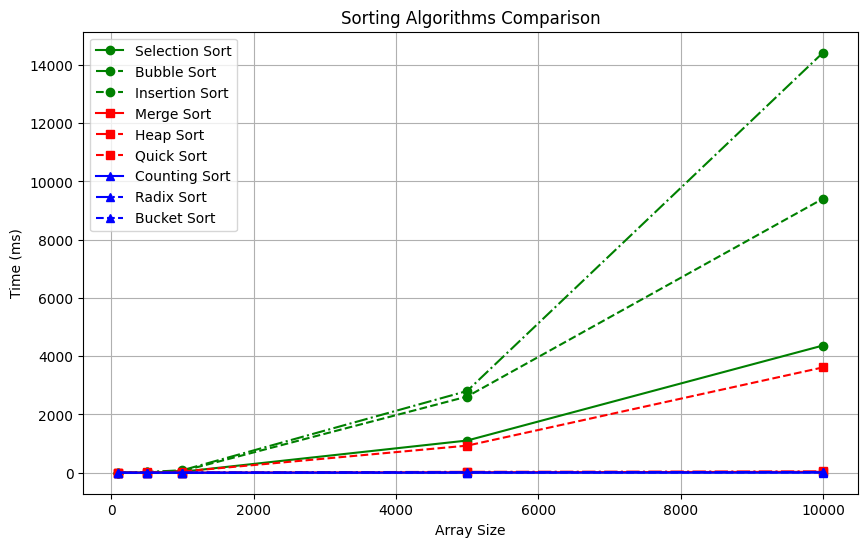

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sizes= [100, 500, 1000, 5000, 10000]
plt.plot(sizes, times_1_green, 'g',marker='o', label="Selection Sort")
plt.plot(sizes, times_2_green, 'g-.',marker='o',  label="Bubble Sort")
plt.plot(sizes, times_3_green, 'g--', marker='o', label="Insertion Sort")

# Plotting the red (Quick, Merge, Heap) times
plt.plot(sizes, times_1_red, 'r', marker='s',label="Merge Sort")
plt.plot(sizes, times_2_red, 'r-.', marker='s',label="Heap Sort")
plt.plot(sizes, times_3_red, 'r--.',marker='s', label="Quick Sort")

# Plotting the blue (Counting, Radix, Bucket) times
plt.plot(sizes, times_1_blue, 'b', marker = '^', label="Counting Sort")
plt.plot(sizes, times_2_blue, 'b-.', marker = '^', label="Radix Sort")
plt.plot(sizes, times_3_blue, 'b--',marker = '^',  label="Bucket Sort")

# Adding labels and title
plt.xlabel('Array Size')
plt.ylabel('Time (ms)')
plt.title('Sorting Algorithms Comparison')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


### Creation of table

        Algorithm Time Complexity  100 Elements  500 Elements  1000 Elements  \
0  Selection Sort           O(n²)      1.441717      9.953499      34.283876   
1     Bubble Sort           O(n²)      1.480818     23.466587      85.989952   
2  Insertion Sort           O(n²)      1.259327     14.968634      58.062077   
3      Merge Sort      O(n log n)      0.000000      1.999617       3.530741   
4       Heap Sort      O(n log n)      0.000000      3.302813       5.512238   
5      Quick Sort      O(n log n)      0.000000     12.475967      40.924788   
6   Counting Sort        O(n + k)      0.000000      0.000000       0.000000   
7      Radix Sort     O(d(n + k))      1.044989      1.185656       3.836870   
8     Bucket Sort        O(n + k)      0.000000      0.999928       1.000166   

   5000 Elements  10000 Elements  
0    1104.550362     4366.421461  
1    2804.644108    14417.019606  
2    2614.163160     9404.586554  
3      15.524149       30.949831  
4      31.311274       4

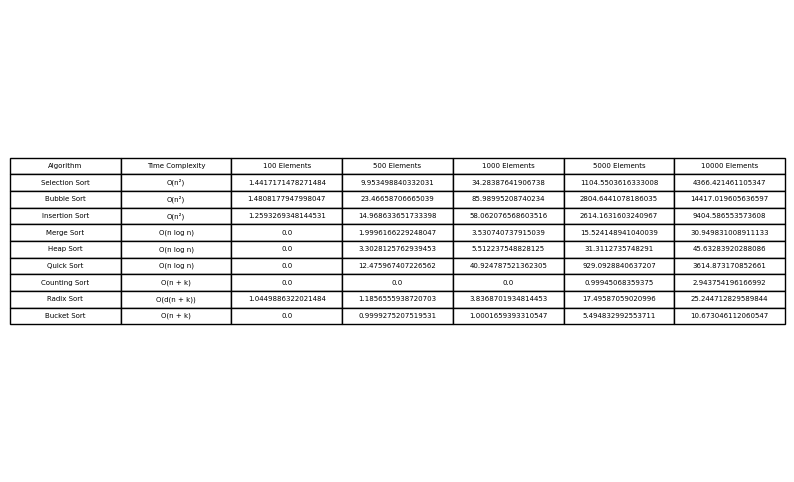

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Data: Replace these with your actual timing values
sizes = [100, 500, 1000, 5000, 10000]
data = {
    "Algorithm": [
        "Selection Sort", "Bubble Sort", "Insertion Sort",
        "Merge Sort", "Heap Sort", "Quick Sort",
        "Counting Sort", "Radix Sort", "Bucket Sort"
    ],
    "Time Complexity": [
        "O(n²)", "O(n²)", "O(n²)",
        "O(n log n)", "O(n log n)", "O(n log n)",
        "O(n + k)", "O(d(n + k))", "O(n + k)"
    ],
    "100 Elements": [
        times_1_green[0], times_2_green[0], times_3_green[0],
        times_1_red[0], times_2_red[0], times_3_red[0],
        times_1_blue[0], times_2_blue[0], times_3_blue[0]
    ],
    "500 Elements": [
        times_1_green[1], times_2_green[1], times_3_green[1],
        times_1_red[1], times_2_red[1], times_3_red[1],
        times_1_blue[1], times_2_blue[1], times_3_blue[1]
    ],
    "1000 Elements": [
        times_1_green[2], times_2_green[2], times_3_green[2],
        times_1_red[2], times_2_red[2], times_3_red[2],
        times_1_blue[2], times_2_blue[2], times_3_blue[2]
    ],
    "5000 Elements": [
        times_1_green[3], times_2_green[3], times_3_green[3],
        times_1_red[3], times_2_red[3], times_3_red[3],
        times_1_blue[3], times_2_blue[3], times_3_blue[3]
    ],
    "10000 Elements": [
        times_1_green[4], times_2_green[4], times_3_green[4],
        times_1_red[4], times_2_red[4], times_3_red[4],
        times_1_blue[4], times_2_blue[4], times_3_blue[4]
    ]
}

# Creating a DataFrame using pandas
df = pd.DataFrame(data)

# Displaying the table
print(df)

# Plotting as a table in matplotlib
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Displaying the table plot
plt.show()